In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

import env

import wrangle_zillow

df = wrangle_zillow.acquire()

pd.options.display.max_rows = 100 

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
#map bathroom counts five and over to the number five, leave all other bathroom counts as is
df['bathroomcnt'] = df['bathroomcnt'].map(lambda x: x if x < 5 else 5)

In [3]:
#drop all bathroom counts with 0 value 
df.drop(df[df['bathroomcnt'] == 0].index, inplace = True)

In [4]:
#map fips numbers to location names 
df['location'] = df.fips.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})

In [5]:
print('Before dropping nulls, %d rows, %d cols' % df.shape)
df = wrangle_zillow.handle_missing_values(df, prop_required_column=.5, prop_required_row=.5)
print('After dropping nulls, %d rows, %d cols' % df.shape)

Before dropping nulls, 76788 rows, 69 cols
After dropping nulls, 65273 rows, 35 cols


In [6]:
df.unitcnt.value_counts()

1.00    46933
2.00     1452
4.00      438
3.00      345
6.00        1
Name: unitcnt, dtype: int64

In [7]:
#drop unit counts over 1 
#df = df.drop.unitcnt[df.unitcnt > 1]

In [8]:

#df = df.drop[['buildingqualitytypeid', 'heatingorsystemdesc', ]]

In [9]:
def split_zillow_data(df):
    '''
    This function performs split on zillow data, stratify churn.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [10]:
#split the data train, validate, test 
train, validate, test = split_zillow_data(df)

In [11]:
train.isnull().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid           9229
calculatedbathnbr                  0
calculatedfinishedsquarefeet       1
finishedsquarefeet12            1241
fips                               0
fullbathcnt                        0
heatingorsystemtypeid           9068
latitude                           0
longitude                          0
lotsizesquarefeet               1780
propertycountylandusecode          0
propertylandusetypeid              0
propertyzoningdesc              9038
rawcensustractandblock             0
regionidcity                     652
regionidcounty                     0
regionidzip                        8
roomcnt                            0
unitcnt                         9011
yearbuilt                         19
structuretaxvaluedollarcnt        34
taxvaluedollarcnt                  0
assessmentyear                     0
l

In [12]:
validate.shape

(15666, 35)

In [13]:
test.shape

(13055, 35)

### What is the distribution of the log error? 

<AxesSubplot:xlabel='logerror'>

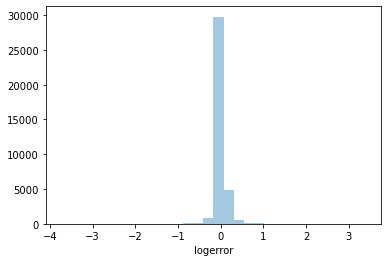

In [14]:
sns.distplot(train['logerror'], kde=False, bins=30)

In [15]:
train['logerror_bin'] = pd.cut(train.logerror, [-6, -0.06, 0.06, 6])

### Which information can be gained by plotting log error against independent variable?

<function matplotlib.pyplot.show(close=None, block=None)>

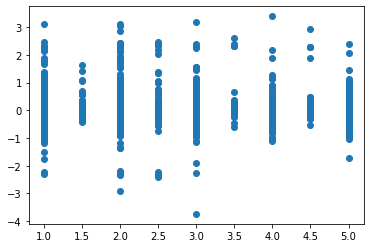

In [16]:
plt.scatter(train['bathroomcnt'],train['logerror'])
plt.show

Key Takeaway: 
- There is less variation in logerror in homes with 6 or more bathrooms 

<function matplotlib.pyplot.show(close=None, block=None)>

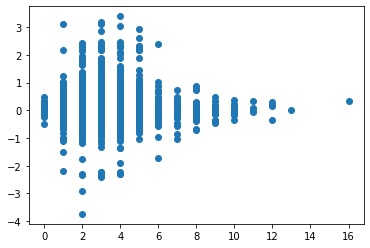

In [17]:
plt.scatter(train['bedroomcnt'],train['logerror'])
plt.show

Key takeaway: 
- The variability of log error is greatest in homes 2, 3, 4 and five bathroom homes 

<function matplotlib.pyplot.show(close=None, block=None)>

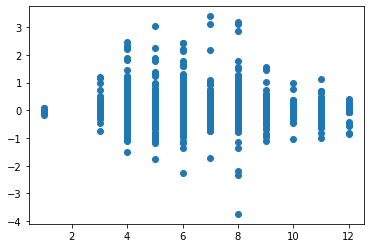

In [18]:
plt.scatter(train['buildingqualitytypeid'],train['logerror'])
plt.show

Key Takeaway: 
- Log error variation seems similar across building quality types 

<function matplotlib.pyplot.show(close=None, block=None)>

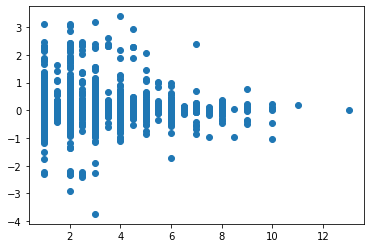

In [19]:
plt.scatter(train['calculatedbathnbr'],train['logerror'])
plt.show

Key Takeaway: 
- Homes in the '5.5 or greater' category seem to have less log error

<function matplotlib.pyplot.show(close=None, block=None)>

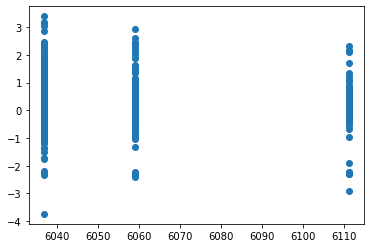

In [20]:
plt.scatter(train['fips'],train['logerror'])
plt.show

Key Takeaway: 
- Log error might be slightly higher in one county, but not significant enough to make it useful for modeling

<function matplotlib.pyplot.show(close=None, block=None)>

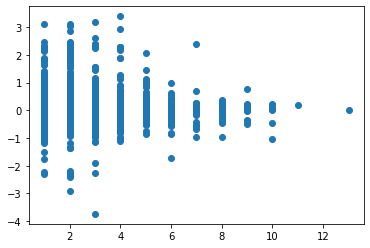

In [21]:
plt.scatter(train['fullbathcnt'],train['logerror'])
plt.show

Key Takeaway: 
- Homes with 3 or less full bathroom counts have the most variation in log error 

<function matplotlib.pyplot.show(close=None, block=None)>

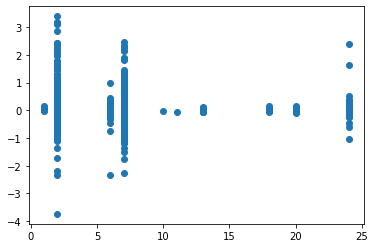

In [22]:
plt.scatter(train['heatingorsystemtypeid'],train['logerror'])
plt.show

Key Takeaway: 
- This feature is not going to useful as the majority of data falls under two categories of which seem to have similar distribution of log errors

<function matplotlib.pyplot.show(close=None, block=None)>

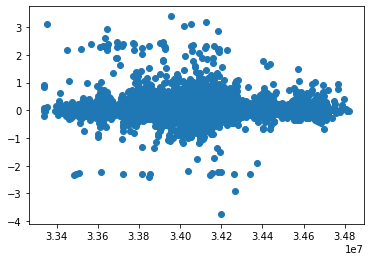

In [23]:
plt.scatter(train['latitude'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

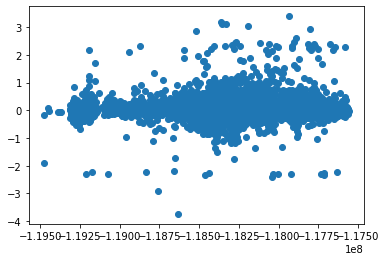

In [24]:
plt.scatter(train['longitude'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

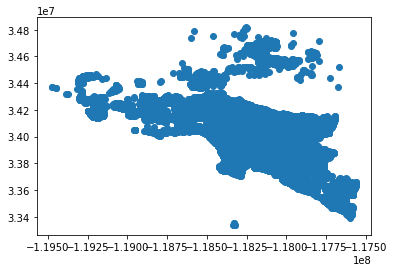

In [25]:
#How can I place a heat map over the longitude and latitude to see how high the 
#log error is 
plt.scatter(train['longitude'], train['latitude'])
plt.show

### If outliers are dropped what will the spread look like?

<function matplotlib.pyplot.show(close=None, block=None)>

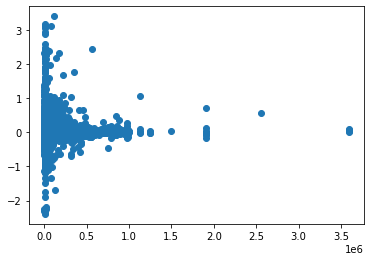

In [26]:
plt.scatter(train['lotsizesquarefeet'],train['logerror'])
plt.show

In [27]:
train.drop(train.index[train['lotsizesquarefeet'] > 1], inplace = True)

In [28]:
train = train.reset_index()

In [29]:
#research np.where 

<function matplotlib.pyplot.show(close=None, block=None)>

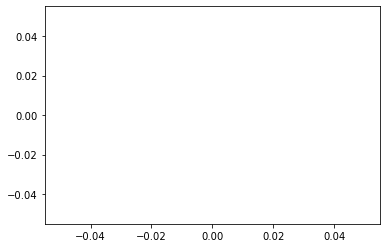

In [30]:
plt.scatter(train['lotsizesquarefeet'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

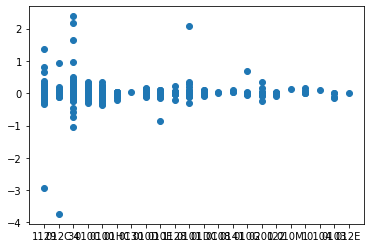

In [31]:
plt.scatter(train['propertycountylandusecode'],train['logerror'])
plt.show

- How many different propertycountylandusecodes are there? What percentage have a small range of log errors?

In [32]:
#The outliers are significantly impacting this graph
train.propertycountylandusecode.value_counts()

34      563
1129    494
010C    331
0100    125
012C     82
010E     42
010D     32
0101     23
01HC     18
01DC     17
1128     12
010G      7
0200      7
122       7
1         7
0103      4
0141      3
0108      2
0130      1
010M      1
0104      1
012E      1
Name: propertycountylandusecode, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

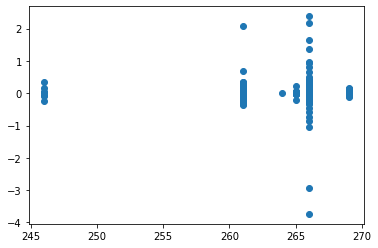

In [33]:
plt.scatter(train['propertylandusetypeid'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

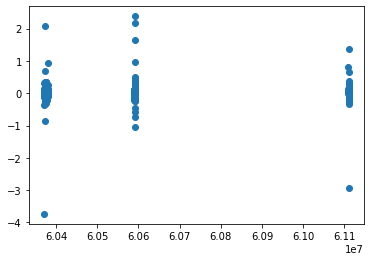

In [34]:
plt.scatter(train['rawcensustractandblock'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

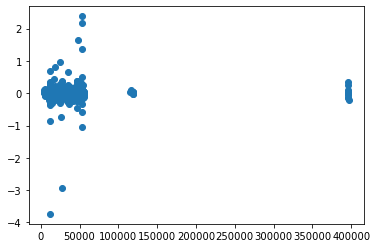

In [35]:
plt.scatter(train['regionidcity'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

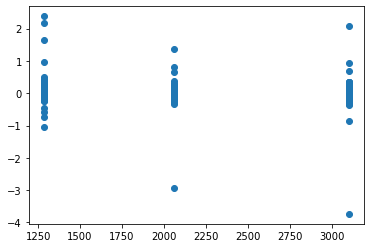

In [36]:
plt.scatter(train['regionidcounty'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

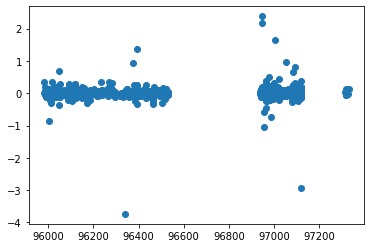

In [37]:
plt.scatter(train['regionidzip'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

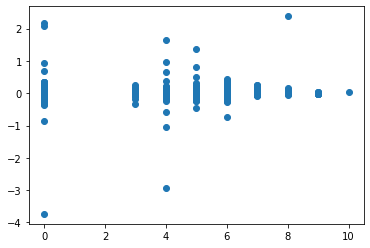

In [38]:
plt.scatter(train['roomcnt'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

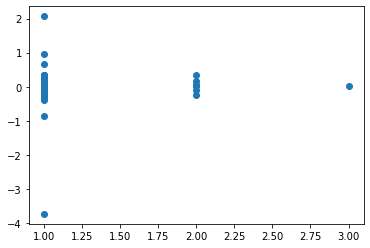

In [39]:
plt.scatter(train['unitcnt'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

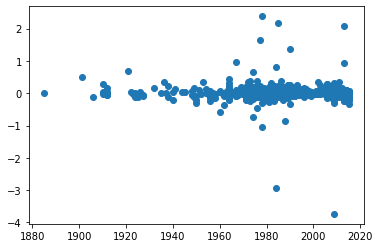

In [40]:
plt.scatter(train['yearbuilt'],train['logerror'])
plt.show

### Will any feature that includes tax leak information?

<function matplotlib.pyplot.show(close=None, block=None)>

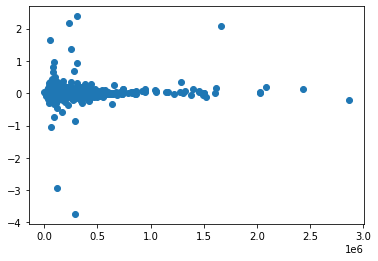

In [41]:
plt.scatter(train['structuretaxvaluedollarcnt'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

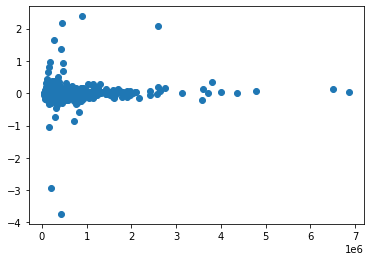

In [42]:
plt.scatter(train['taxvaluedollarcnt'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

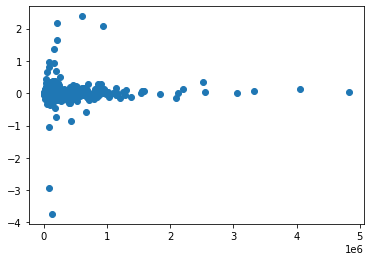

In [43]:
plt.scatter(train['landtaxvaluedollarcnt'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

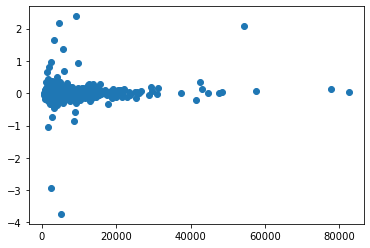

In [44]:
plt.scatter(train['taxamount'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

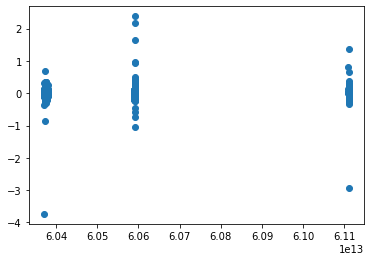

In [45]:
plt.scatter(train['censustractandblock'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

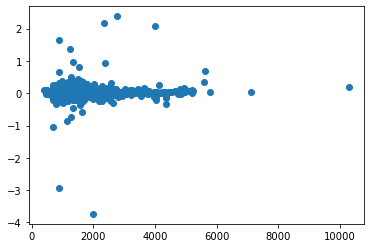

In [46]:
plt.scatter(train['calculatedfinishedsquarefeet'],train['logerror'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

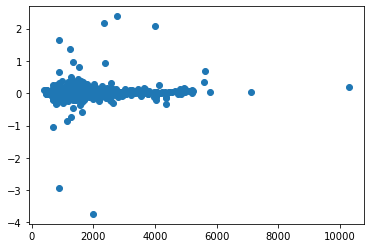

In [47]:
plt.scatter(train['finishedsquarefeet12'],train['logerror'])
plt.show

### Features that might be useful in clustering 
- Bedroom count 
- Bathroom count 
- calculatedbathnbr
- fullbathcnt
- roomcnt
- yearbuilt
- calculatedfinishedsquarefeet 
- finishedsquarefeet12 


In [48]:
train.shape

(1780, 37)

<function matplotlib.pyplot.show(close=None, block=None)>

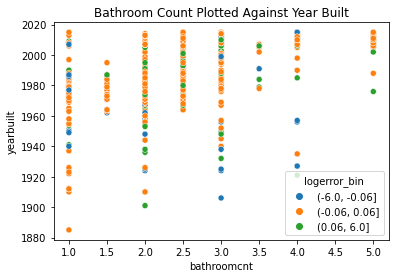

In [49]:
sns.scatterplot(x = 'bathroomcnt', y='yearbuilt', data=train, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

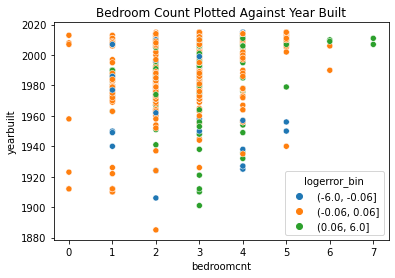

In [50]:
sns.scatterplot(x = 'bedroomcnt', y='yearbuilt', data=train, hue='logerror_bin')
plt.title('Bedroom Count Plotted Against Year Built')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

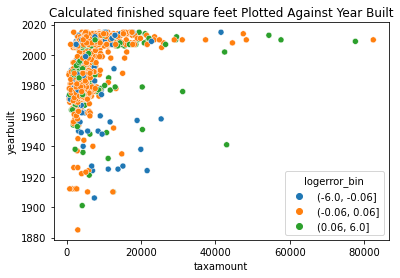

In [51]:
sns.scatterplot(x = 'taxamount', y='yearbuilt', data=train, hue='logerror_bin')
plt.title('Calculated finished square feet Plotted Against Year Built')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

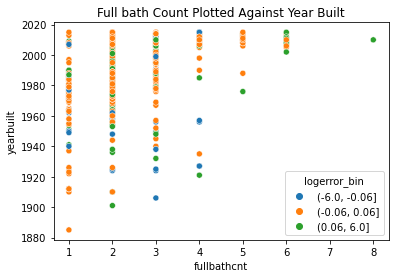

In [52]:
sns.scatterplot(x = 'fullbathcnt', y='yearbuilt', data=train, hue='logerror_bin')
plt.title('Full bath Count Plotted Against Year Built')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

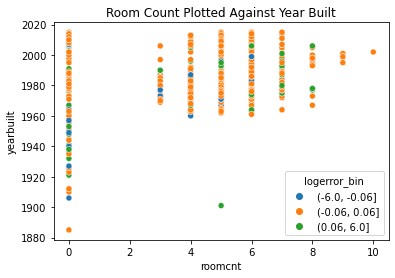

In [53]:
sns.scatterplot(x = 'roomcnt', y='yearbuilt', data=train, hue='logerror_bin')
plt.title('Room Count Plotted Against Year Built')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

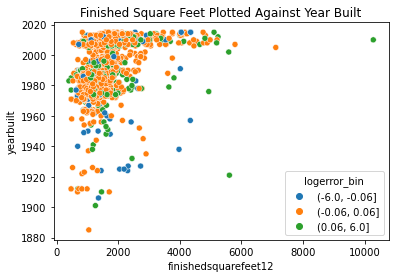

In [54]:
sns.scatterplot(x = 'finishedsquarefeet12', y='yearbuilt', data=train, hue='logerror_bin')
plt.title('Finished Square Feet Plotted Against Year Built')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

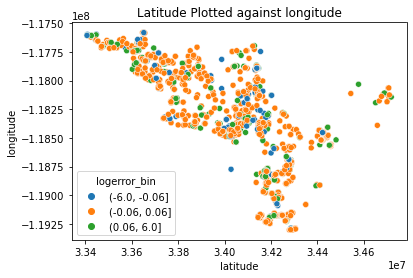

In [55]:
sns.scatterplot(x = 'latitude', y='longitude', data=train, hue='logerror_bin')
plt.title('Latitude Plotted against longitude')
plt.show

In [56]:
train.shape

(1780, 37)

In [57]:
sns.clustermap

<function seaborn.matrix.clustermap(data, *, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)>

In [58]:
train_Ventura = train[train.location == 'Ventura']
train_LA = train[train.location == 'LA']
train_Orange = train[train.location == 'Orange']

In [59]:
train_Ventura.shape

(506, 37)

In [60]:
train_LA.shape

(697, 37)

In [61]:
train_Orange.shape

(577, 37)

In [62]:
train_Ventura.logerror_bin.value_counts()

(-0.06, 0.06]    385
(0.06, 6.0]       83
(-6.0, -0.06]     38
Name: logerror_bin, dtype: int64

In [63]:
train_Orange.logerror_bin.value_counts()

(-0.06, 0.06]    421
(0.06, 6.0]       86
(-6.0, -0.06]     70
Name: logerror_bin, dtype: int64

In [64]:
train_LA.logerror_bin.value_counts()

(-0.06, 0.06]    530
(0.06, 6.0]       90
(-6.0, -0.06]     77
Name: logerror_bin, dtype: int64

In [65]:
train_onebath = train[train.bathroomcnt == 1]
train_overonebath = train[train.bathroomcnt == 1.5]
train_twobath = train[train.bathroomcnt == 2]
train_overtwobath = train[train.bathroomcnt == 2.5]
train_threebath = train[train.bathroomcnt == 3]
train_overthreebath = train[train.bathroomcnt == 3.5]
train_fourbath = train[train.bathroomcnt == 4]
train_overfourbath = train[train.bathroomcnt == 4.5]
train_fivebath = train[train.bathroomcnt == 5]

In [66]:
train.yearbuilt.describe()

count               1,780.00
mean                1,990.37
std                    19.07
min                 1,885.00
25%                 1,976.00
50%                 1,989.00
75%                 2,008.00
max                 2,015.00
Name: yearbuilt, dtype: float64

In [67]:
train['logerror_bin'] = pd.cut(train.logerror, [-6, -0.06, 0.06, 6])

In [68]:
#return this series as a series of strings .astype(string)
train['yearbuilt_bin'] = pd.cut(train.yearbuilt, [1878, 1952, 1966, 1984, 2015]).astype('string')

In [69]:
train.yearbuilt_bin.value_counts()

(1984, 2015]    1078
(1966, 1984]     594
(1952, 1966]      62
(1878, 1952]      46
Name: yearbuilt_bin, dtype: Int64

In [70]:
#how to get a subset to another 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   index                         1780 non-null   int64   
 1   id                            1780 non-null   int64   
 2   parcelid                      1780 non-null   int64   
 3   bathroomcnt                   1780 non-null   float64 
 4   bedroomcnt                    1780 non-null   float64 
 5   buildingqualitytypeid         640 non-null    float64 
 6   calculatedbathnbr             1780 non-null   float64 
 7   calculatedfinishedsquarefeet  1780 non-null   float64 
 8   finishedsquarefeet12          1773 non-null   float64 
 9   fips                          1780 non-null   float64 
 10  fullbathcnt                   1780 non-null   float64 
 11  heatingorsystemtypeid         1236 non-null   float64 
 12  latitude                      1780 non-null   fl

In [71]:
train_oldesthomes = train[train.yearbuilt_bin == '(1878, 1952]']
train_olderhomes = train[train.yearbuilt_bin == '(1952, 1966]']
train_newerhomes = train[train.yearbuilt_bin == '(1966, 1984]']
train_newesthomes = train[train.yearbuilt_bin == '(1984, 2015]']

In [72]:
train_oldesthomes.shape

(46, 38)

In [73]:
train_olderhomes.shape

(62, 38)

In [74]:
train_newerhomes.shape

(594, 38)

In [75]:
train_newesthomes.shape

(1078, 38)

### One Bath 

In [76]:
train_onebath.logerror_bin.value_counts(normalize=True)

(-0.06, 0.06]                   0.72
(-6.0, -0.06]                   0.15
(0.06, 6.0]                     0.13
Name: logerror_bin, dtype: float64

NameError: name 'data1' is not defined

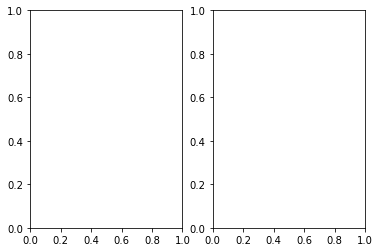

In [77]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error One bath', fontdict = {'fontsize' : 14})
data1 = [65, 18, 17]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_onebath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error One bath', fontdict = {'fontsize' : 14})
data1 = [65, 18, 17]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_onebath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
train_overonebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error 1.5 bath', fontdict = {'fontsize' : 14})
data1 = [78, 13, 9]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_overonebath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})


In [ ]:
train_twobath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error 2 bath', fontdict = {'fontsize' : 14})
data1 = [72, 15, 13]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_twobath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
train_overtwobath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error 2.5 bath', fontdict = {'fontsize' : 14})
data1 = [79, 16, 5]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_overtwobath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
train_threebath.shape

In [ ]:
train_threebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error 3 bath', fontdict = {'fontsize' : 14})
data1 = [74, 16, 10]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_threebath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
train_overthreebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error 3.5 bath', fontdict = {'fontsize' : 14})
data1 = [69, 21, 10]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_overthreebath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
train_fourbath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error 4 bath', fontdict = {'fontsize' : 14})
data1 = [61, 24, 15]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_fourbath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
train_overfourbath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error 4.5 bath', fontdict = {'fontsize' : 14})
data1 = [66, 23, 11]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_overfourbath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
train_fivebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error 5 or Over bath', fontdict = {'fontsize' : 14})
data1 = [51, 36, 13]
labels1 = ['Acceptable Range', 'Over Range', 'Under Range' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Error by location",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_fivebath, hue='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

### Control for location 

In [ ]:
train_Ventura = train[train.location == 'Ventura']
train_LA = train[train.location == 'LA']
train_Orange = train[train.location == 'Orange']

In [ ]:
trainv_onebath = train_Ventura[train_Ventura.bathroomcnt == 1]
trainv_overonebath = train_Ventura[train_Ventura.bathroomcnt == 1.5]
trainv_twobath = train_Ventura[train_Ventura.bathroomcnt == 2]
trainv_overtwobath = train_Ventura[train_Ventura.bathroomcnt == 2.5]
trainv_threebath = train_Ventura[train_Ventura.bathroomcnt == 3]
trainv_overthreebath = train_Ventura[train_Ventura.bathroomcnt == 3.5]
trainv_fourbath = train_Ventura[train_Ventura.bathroomcnt == 4]
trainv_overfourbath = train_Ventura[train_Ventura.bathroomcnt == 4.5]
trainv_fivebath = train_Ventura[train_Ventura.bathroomcnt == 5]

In [ ]:
traino_onebath = train_Orange[train_Orange.bathroomcnt == 1]
traino_overonebath = train_Orange[train_Orange.bathroomcnt == 1.5]
traino_twobath = train_Orange[train_Orange.bathroomcnt == 2]
traino_overtwobath = train_Orange[train_Orange.bathroomcnt == 2.5]
traino_threebath = train_Orange[train_Orange.bathroomcnt == 3]
traino_overthreebath = train_Orange[train_Orange.bathroomcnt == 3.5]
traino_fourbath = train_Orange[train_Orange.bathroomcnt == 4]
traino_overfourbath = train_Orange[train_Orange.bathroomcnt == 4.5]
traino_fivebath = train_Orange[train_Orange.bathroomcnt == 5]

In [ ]:
trainl_onebath = train_LA[train_LA.bathroomcnt == 1]
trainl_overonebath = train_LA[train_LA.bathroomcnt == 1.5]
trainl_twobath = train_LA[train_LA.bathroomcnt == 2]
trainl_overtwobath = train_LA[train_LA.bathroomcnt == 2.5]
trainl_threebath = train_LA[train_LA.bathroomcnt == 3]
trainl_overthreebath = train_LA[train_LA.bathroomcnt == 3.5]
trainl_fourbath = train_LA[train_LA.bathroomcnt == 4]
trainl_overfourbath = train_LA[train_LA.bathroomcnt == 4.5]
trainl_fivebath = train_LA[train_LA.bathroomcnt == 5]

# Control for County, Control by bathroom count 

### Ventura

- One Bathroom 

In [ ]:
trainv_onebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura 1 bath', fontdict = {'fontsize' : 14})
data1 = [65, 21, 14]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura One Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainv_onebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

- One and half baths 

In [ ]:
trainv_overonebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura 1.5 bath', fontdict = {'fontsize' : 14})
data1 = [71, 20, 9]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura 1.5 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainv_overonebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

- Ventura Two baths 

In [ ]:
trainv_twobath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura 2 bath', fontdict = {'fontsize' : 14})
data1 = [76, 13, 11]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura Two Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainv_twobath, hue='logerror_bin',style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainv_overtwobath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura 2.5 bath', fontdict = {'fontsize' : 14})
data1 = [78, 18, 4]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura 2.5 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainv_overtwobath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainv_threebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura 3 bath', fontdict = {'fontsize' : 14})
data1 = [79, 13, 8]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura three Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainv_threebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainv_overthreebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura 3.5 bath', fontdict = {'fontsize' : 14})
data1 = [75, 17, 8]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura 3.5 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainv_overthreebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainv_fourbath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura 4 bath', fontdict = {'fontsize' : 14})
data1 = [72, 21, 7]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura four Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainv_fourbath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [78]:
trainv_overfourbath.logerror_bin.value_counts(normalize=True)

NameError: name 'trainv_overfourbath' is not defined

NameError: name 'data1' is not defined

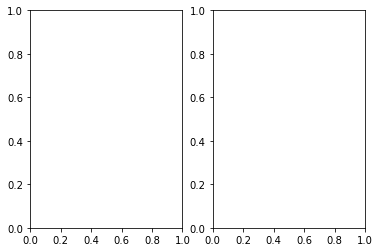

In [79]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura 4.5 bath', fontdict = {'fontsize' : 14})
data1 = [69, 21, 10]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura 4.5 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=train_overfourbath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainv_fivebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Ventura Five bath', fontdict = {'fontsize' : 14})
data1 = [49, 39, 12]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Ventura Five Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainv_fivebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

### Orange 

In [ ]:
traino_onebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 1 bath', fontdict = {'fontsize' : 14})
data1 = [69, 17, 14]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange One Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_onebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
traino_overonebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 1.5 bath', fontdict = {'fontsize' : 14})
data1 = [80, 11, 9]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange 1.5 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_overonebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
traino_twobath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 2 bath', fontdict = {'fontsize' : 14})
data1 = [77, 14, 9]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange two Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_twobath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
traino_overtwobath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 2.5 bath', fontdict = {'fontsize' : 14})
data1 = [79, 15, 6]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange 2.5 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_overtwobath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
traino_threebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 3 bath', fontdict = {'fontsize' : 14})
data1 = [74, 17, 9]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange 3 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_threebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
traino_overthreebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 3.5 bath', fontdict = {'fontsize' : 14})
data1 = [66, 24, 10]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange 3.5 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_overthreebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
traino_fourbath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 4 bath', fontdict = {'fontsize' : 14})
data1 = [63, 25, 12]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange 4 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_fourbath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
traino_overfourbath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 4.5 bath', fontdict = {'fontsize' : 14})
data1 = [64, 24, 12]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange 4.5 Bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_overfourbath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
traino_fivebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: Orange 5 or Over bath', fontdict = {'fontsize' : 14})
data1 = [57, 34, 9]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("Orange 5 or over bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_fivebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

### LA County 

In [ ]:
trainl_onebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: LA one bath', fontdict = {'fontsize' : 14})
data1 = [64, 19, 17]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("LA one bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainl_onebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainl_twobath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: LA Two bath', fontdict = {'fontsize' : 14})
data1 = [71, 16, 13]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("LA Two Bath",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainl_twobath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainl_threebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: LA 3 bath', fontdict = {'fontsize' : 14})
data1 = [73, 16, 11]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("LA 3 bath",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=trainl_threebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainl_fourbath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: LA 4 bath', fontdict = {'fontsize' : 14})
data1 = [61, 24, 15]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("LA 4 bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_fivebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
trainl_fivebath.logerror_bin.value_counts(normalize=True)

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.pie(data1, labels = labels1, colors = colors, autopct='%.0f%%')
ax1.set_title('Log Error: LA 5 or over bath', fontdict = {'fontsize' : 14})
data1 = [50, 36, 14]
labels1 = ['Acceptable Range', 'Over Estimate', 'Under Estimate' ]
colors = sns.color_palette('coolwarm')[0:5]

ax2.set_title("LA 5 or over bath Log Error",  fontdict = {'fontsize' : 14})
sns.scatterplot(x = 'latitude', y='longitude', data=traino_fivebath, hue='logerror_bin', style='logerror_bin')


plt.tight_layout()
sns.set(rc = {'figure.figsize':(10,6)})

In [ ]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train_Ventura[train_Ventura.bathroomcnt == 1.5], hue='logerror_bin')
plt.title('latitude and longitude')
plt.show

In [ ]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train_Ventura[train_Ventura.bathroomcnt == 2], hue='logerror_bin')
plt.title('latitude and longitude')
plt.show

In [ ]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train_Ventura[train_Ventura.bathroomcnt == 2.5], hue='logerror_bin')
plt.title('latitude and longitude')
plt.show

In [ ]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train_Ventura[train_Ventura.bathroomcnt == 3], hue='logerror_bin')
plt.title('latitude and longitude')
plt.show

In [ ]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train_Ventura[train_Ventura.bathroomcnt == 3.5], hue='logerror_bin')
plt.title('latitude and longitude')
plt.show

In [ ]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train_Ventura[train_Ventura.bathroomcnt == 4], hue='logerror_bin')
plt.title('latitude and longitude')
plt.show

In [ ]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train_Ventura[train_Ventura.bathroomcnt == 4.5], hue='logerror_bin')
plt.title('latitude and longitude')
plt.show

In [ ]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train_Ventura[train_Ventura.bathroomcnt == 5], hue='logerror_bin')
plt.title('latitude and longitude')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt < 2], hue='logerror_bin')
plt.title('Calculated Square Feet Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt > 2], hue='logerror_bin')
plt.title('Calculated Square Feet Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'finishedsquarefeet12', y='yearbuilt', data=train_Ventura, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura, hue='logerror_bin')
plt.title('Latitude plotted against longitude in Ventura County')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 1], hue='logerror_bin')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 1.5], hue='logerror_bin')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 2], hue='logerror_bin')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 2.5], hue='logerror_bin')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 3], hue='logerror_bin')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 3.5], hue='logerror_bin')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 4], hue='logerror_bin')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 4.5], hue='logerror_bin')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Ventura[train_Ventura.bathroomcnt == 5], hue='logerror_bin')
plt.show

### Orange 

In [ ]:
train_Orange.shape

In [ ]:
train_Orange.columns

In [ ]:
train_Orange.propertylandusedesc.value_counts()

In [ ]:
sns.scatterplot(x = 'longitude', y='taxamount', data=train_Orange[train_Orange.propertylandusedesc == 'Condominium'], hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'bathroomcnt', y='yearbuilt', data=train_Orange[train_Orange, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y='yearbuilt', data=train_Orange, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'finishedsquarefeet12', y='yearbuilt', data=train_Orange, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_Orange, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

### LA

In [ ]:
train_LA.shape

In [ ]:
sns.scatterplot(x = 'bathroomcnt', y='yearbuilt', data=train_LA, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y='yearbuilt', data=train_LA, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'finishedsquarefeet12', y='yearbuilt', data=train_LA, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show

In [ ]:
sns.scatterplot(x = 'latitude', y='longitude', data=train_LA, hue='logerror_bin')
plt.title('Bathroom Count Plotted Against Year Built')
plt.show